# Global Forecaster Example

This notebook demonstrates how to use the `GlobalForecaster` to train a single model on multiple time series and generate forecasts.

## 1. Import Libraries

In [1]:
import sys

sys.path.append("..")

import numpy as np
import pandas as pd
from catboost import CatBoostRegressor
from src.global_forecasting.forecaster import GlobalForecaster

## 2. Generate Sample Data

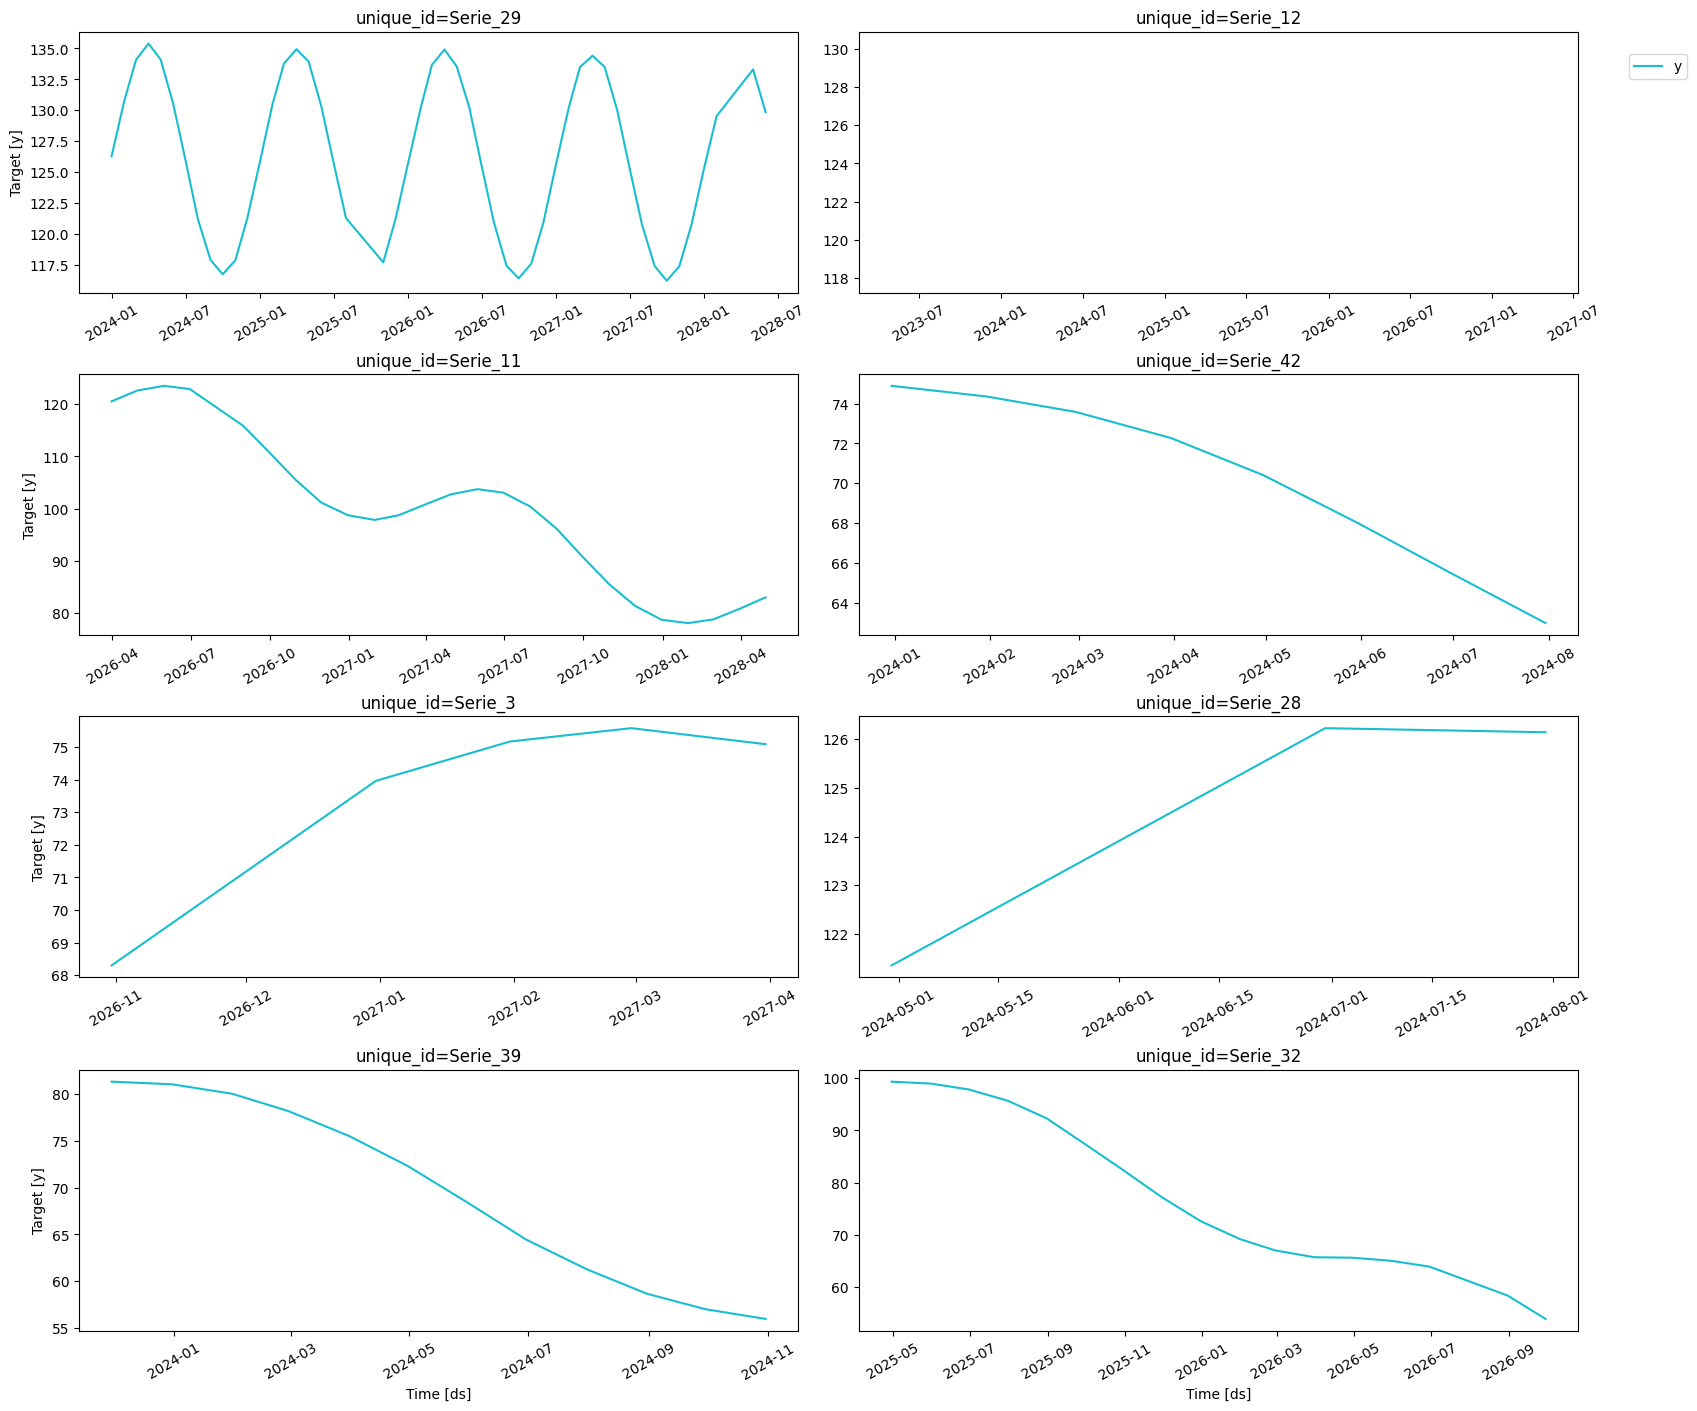

In [2]:
from src.global_forecasting.utils import generate_sample_data
from utilsforecast.plotting import plot_series
from datetime import datetime

sample_data = generate_sample_data(freq='ME', n_series = 50, pct_of_missing=0.1, start_date = '2019-01-01', end_date = '2029-01-01')

plot_series(sample_data)

In [3]:
sample_data

,ds,unique_id,y,dynamic_feature_1,static_feature_1
0,2027-07-31,Serie_1,77.998499,11.790266,1
1,2027-09-30,Serie_1,82.067453,6.761148,1
2,2023-04-30,Serie_2,104.154836,27.672621,1
3,2023-06-30,Serie_2,116.226185,22.623815,1
4,2023-07-31,Serie_2,119.633678,19.514629,1
...,...,...,...,...,...
1252,2028-04-30,Serie_50,135.037246,27.127546,3
1253,2028-05-31,Serie_50,133.809340,25.805558,3
1254,2028-06-30,Serie_50,132.103313,19.812050,3
1255,2028-07-31,Serie_50,130.411883,16.530735,3


## 3. Initialize and Fit the Forecaster

In [4]:
cutoff_date = '2025-09-01'

train = sample_data[sample_data['ds'] < cutoff_date]
test = sample_data[sample_data['ds'] >= cutoff_date]

In [5]:
train

,ds,unique_id,y,dynamic_feature_1,static_feature_1
2,2023-04-30,Serie_2,104.154836,27.672621,1
3,2023-06-30,Serie_2,116.226185,22.623815,1
4,2023-07-31,Serie_2,119.633678,19.514629,1
5,2023-08-31,Serie_2,120.922897,10.459965,1
6,2023-09-30,Serie_2,119.873148,9.355746,1
...,...,...,...,...,...
1243,2024-12-31,Serie_49,152.769615,22.747616,1
1244,2025-01-31,Serie_49,154.540324,24.264594,1
1245,2025-02-28,Serie_49,158.024619,28.236272,1
1246,2025-03-31,Serie_49,162.590743,28.172910,1


In [6]:
test

,ds,unique_id,y,dynamic_feature_1,static_feature_1
0,2027-07-31,Serie_1,77.998499,11.790266,1
1,2027-09-30,Serie_1,82.067453,6.761148,1
26,2025-09-30,Serie_2,174.063807,7.689802,1
27,2025-10-31,Serie_2,172.036620,14.465658,1
28,2025-11-30,Serie_2,170.075644,12.663387,1
...,...,...,...,...,...
1252,2028-04-30,Serie_50,135.037246,27.127546,3
1253,2028-05-31,Serie_50,133.809340,25.805558,3
1254,2028-06-30,Serie_50,132.103313,19.812050,3
1255,2028-07-31,Serie_50,130.411883,16.530735,3


In [7]:
model = CatBoostRegressor(random_state=42, verbose=0)
forecaster = GlobalForecaster(
    model=model,
    lags=[1, 7],
    static_features=['static_feature_1'],
    dynamic_features=['dynamic_feature_1'],
    freq='M'
)

forecaster.fit(train)

In [8]:
test

,ds,unique_id,y,dynamic_feature_1,static_feature_1
0,2027-07-31,Serie_1,77.998499,11.790266,1
1,2027-09-30,Serie_1,82.067453,6.761148,1
26,2025-09-30,Serie_2,174.063807,7.689802,1
27,2025-10-31,Serie_2,172.036620,14.465658,1
28,2025-11-30,Serie_2,170.075644,12.663387,1
...,...,...,...,...,...
1252,2028-04-30,Serie_50,135.037246,27.127546,3
1253,2028-05-31,Serie_50,133.809340,25.805558,3
1254,2028-06-30,Serie_50,132.103313,19.812050,3
1255,2028-07-31,Serie_50,130.411883,16.530735,3


## 4. Prediction

In [9]:
predictions = forecaster.predict(X_df = test)

/Users/giordanoalvari/Projects/global-forecasting/notebooks/../src/global_forecasting/forecaster.py:309: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pred_dates = pd.date_range(


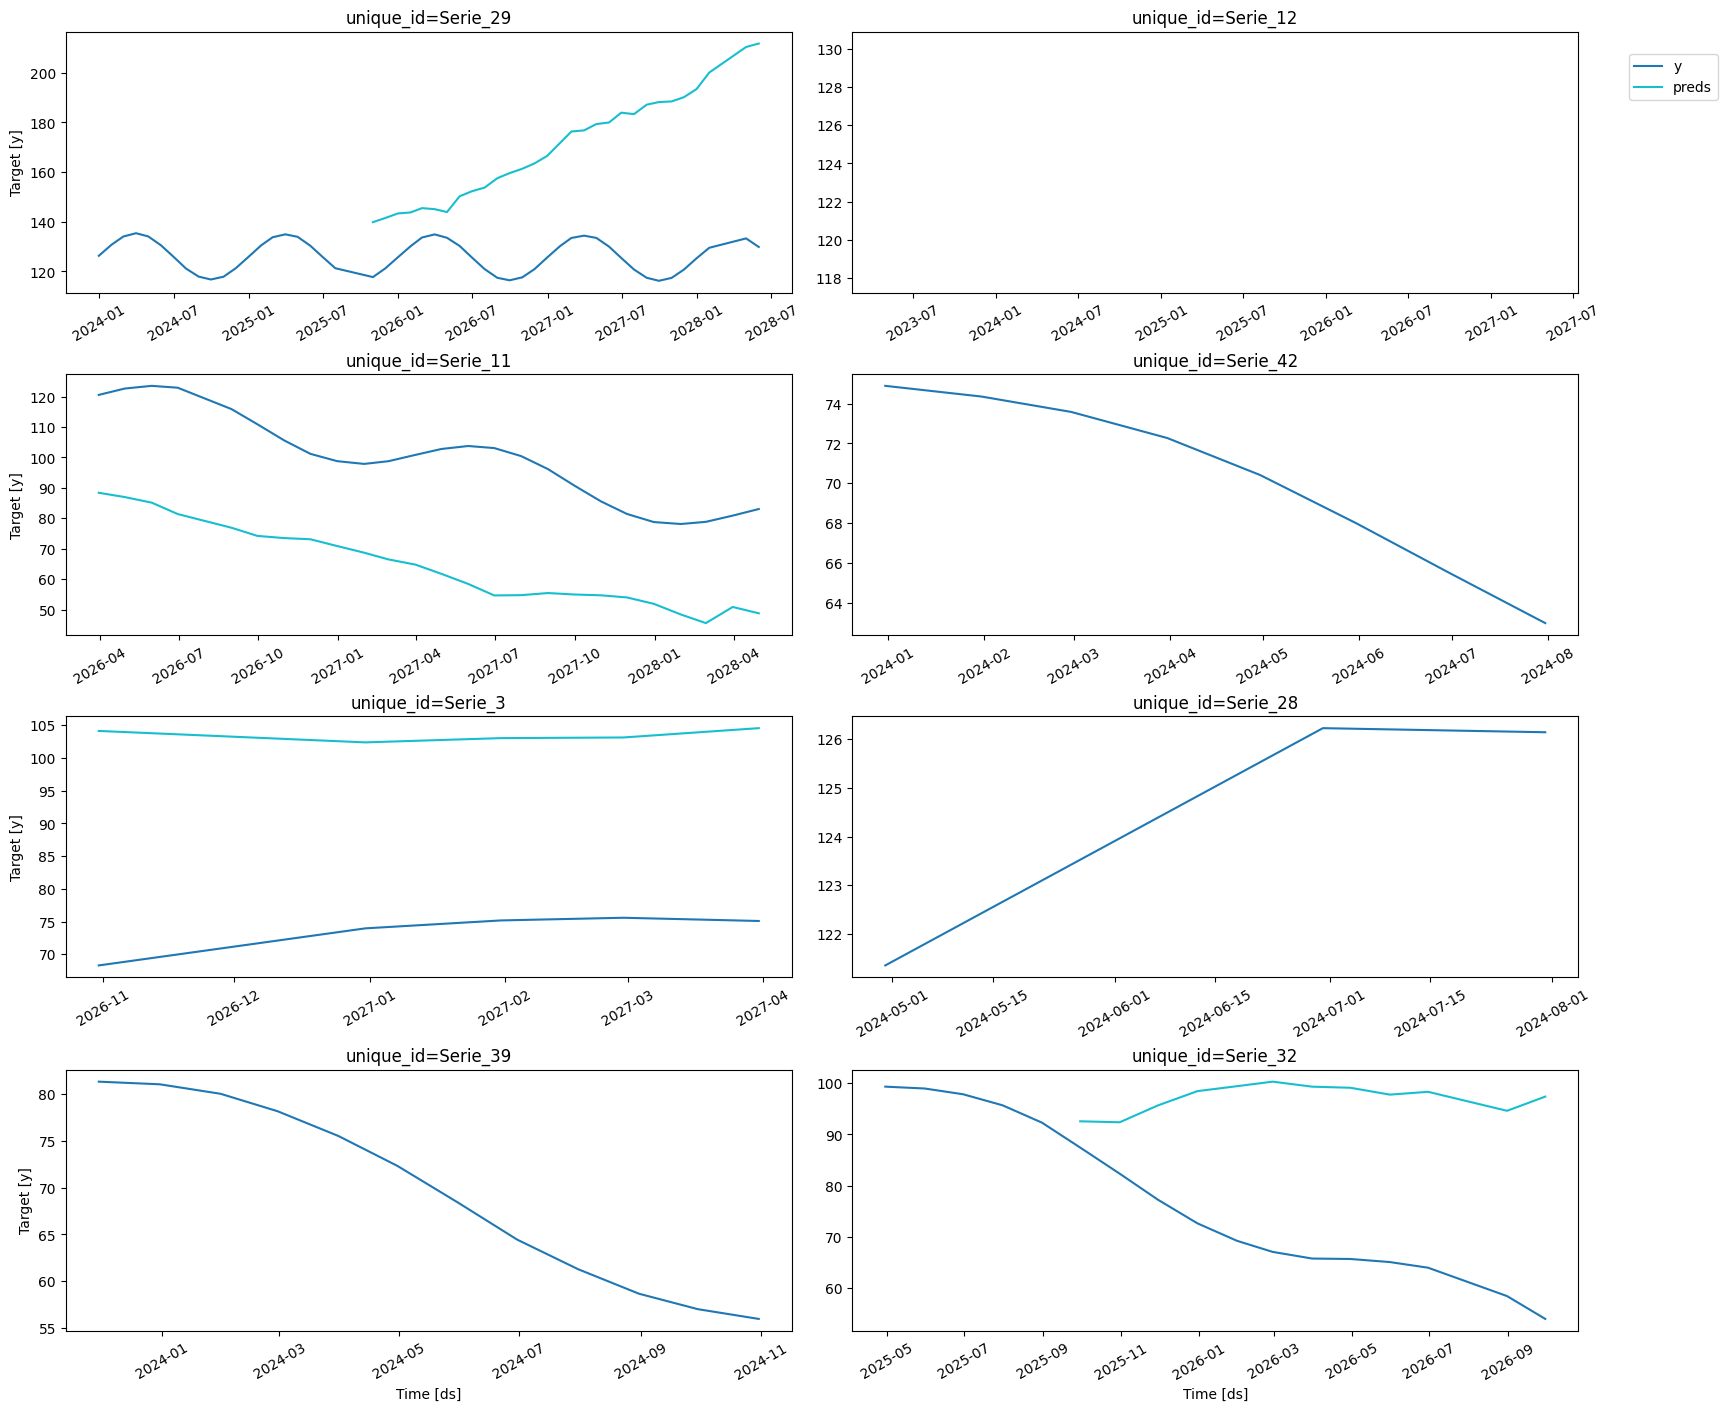

In [10]:
plot_series(sample_data, predictions)

## 5. Example with no lags

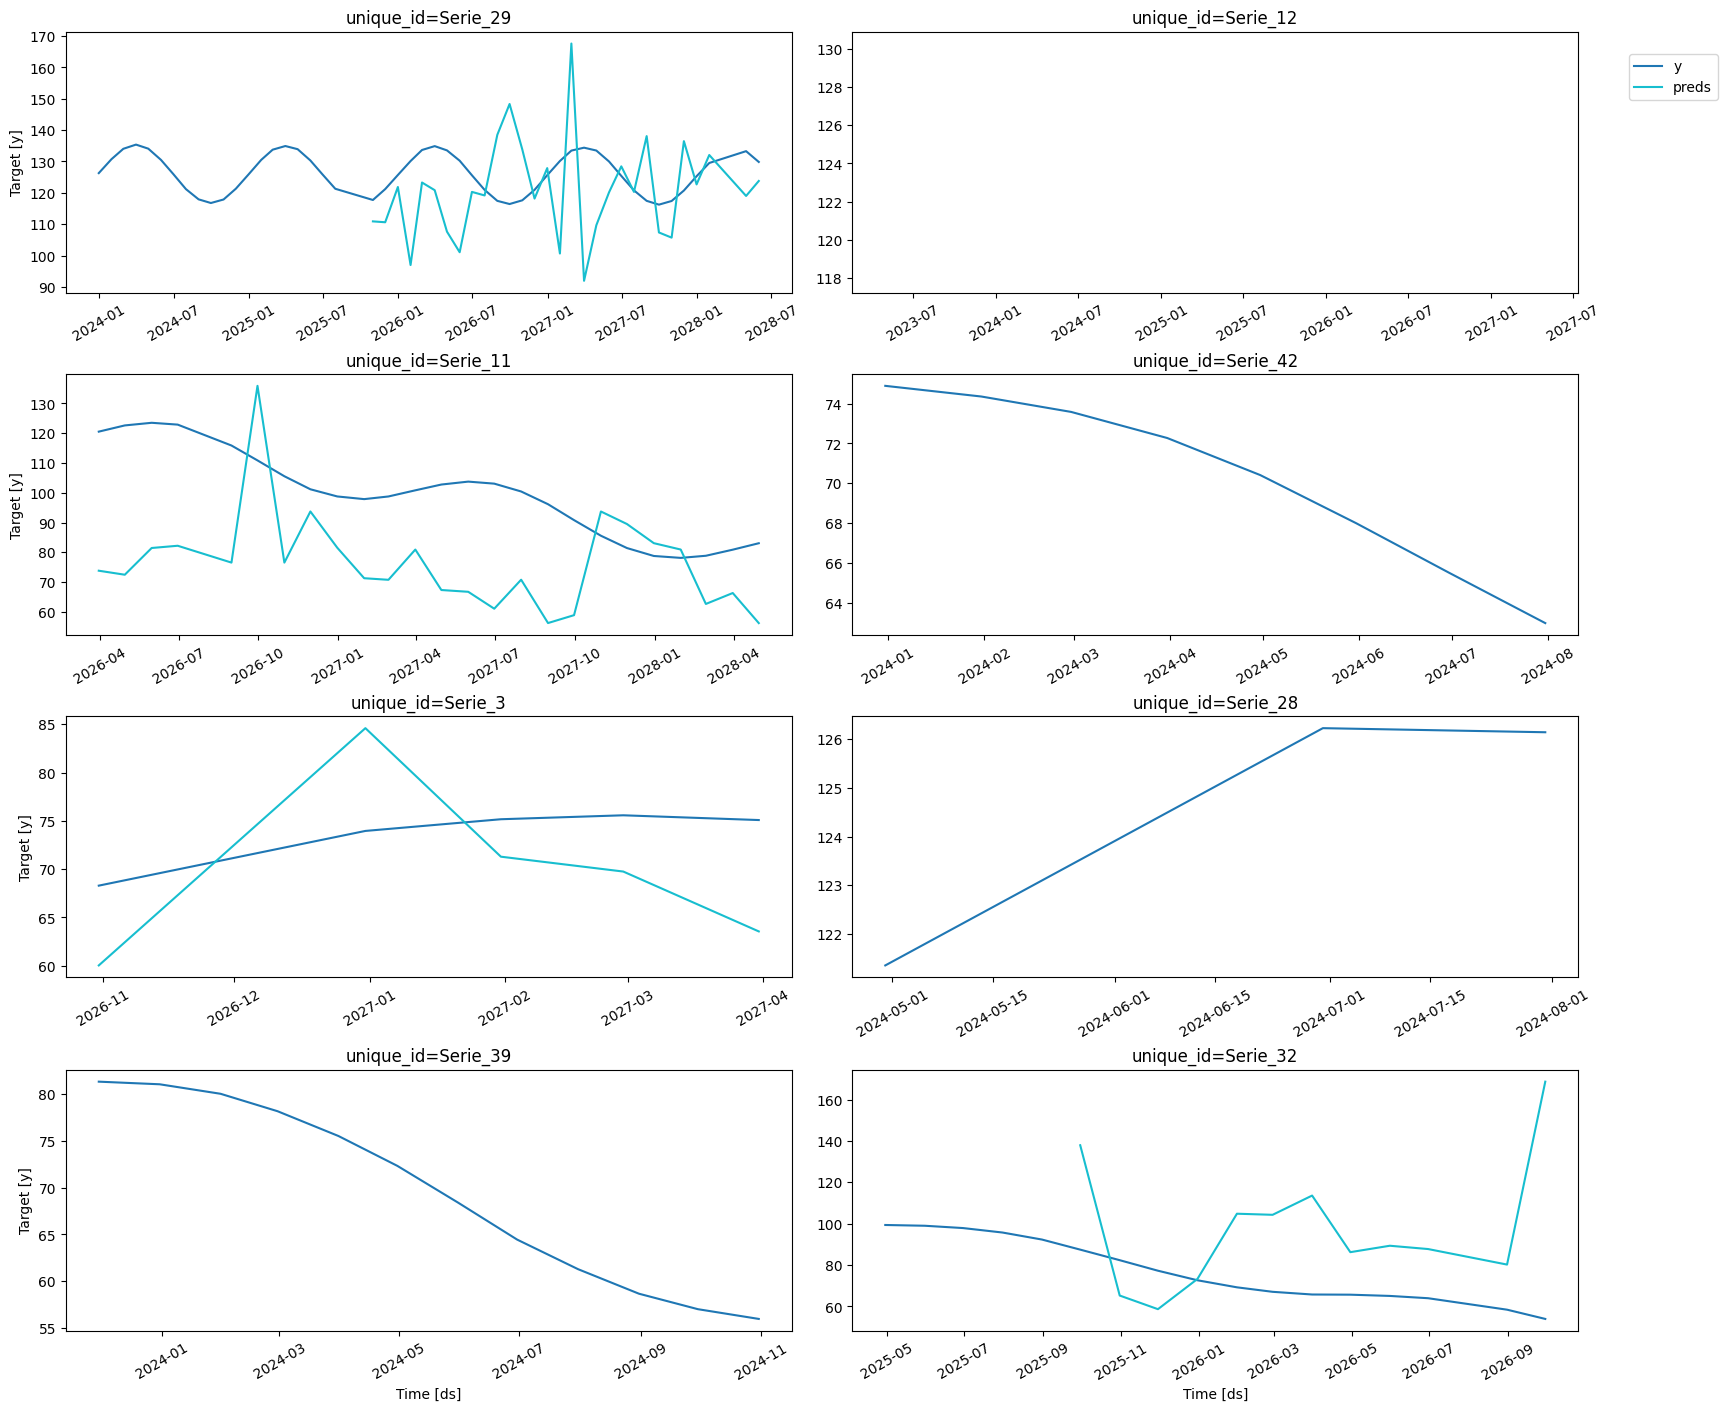

In [11]:
model = CatBoostRegressor(random_state=42, verbose=0)
forecaster = GlobalForecaster(
    model=model,
    lags=[],
    static_features=['static_feature_1'],
    dynamic_features=['dynamic_feature_1'],
    freq='M'
)

forecaster.fit(train)

predictions = forecaster.predict(X_df = test)
plot_series(sample_data, predictions)

## 5. Example with only lags (NOT MEANT TO BE USED FROM A STATISTICAL PERSPECTIVE)

/Users/giordanoalvari/Projects/global-forecasting/notebooks/../src/global_forecasting/forecaster.py:303: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pred_dates = pd.date_range(


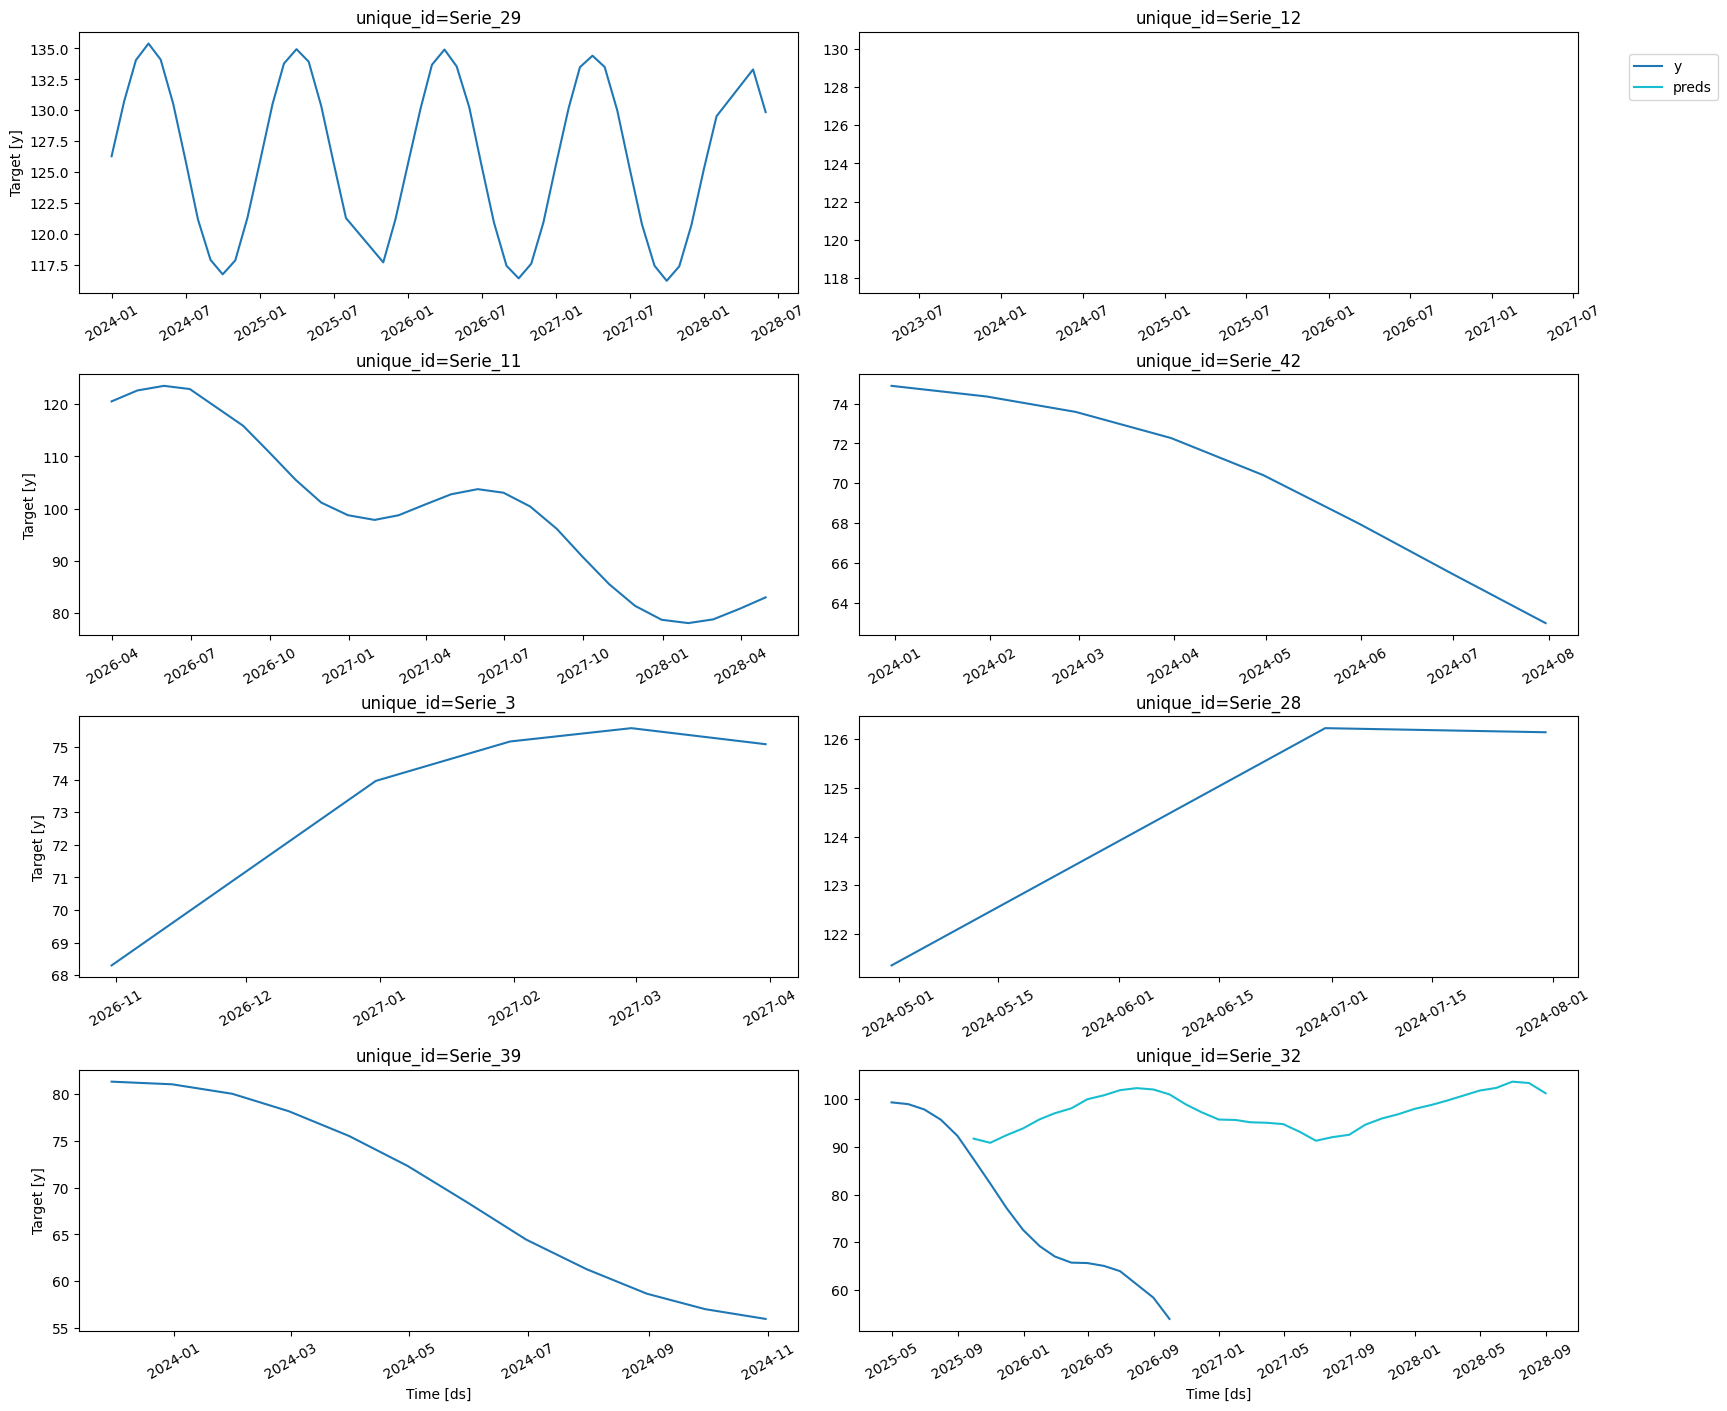

In [12]:
model = CatBoostRegressor(random_state=42, verbose=0)
forecaster = GlobalForecaster(
    model=model,
    lags=[1,2,3],
    static_features=[],
    dynamic_features=[],
    freq='M'
)

forecaster.fit(train)

predictions = forecaster.predict(horizon=36)
plot_series(sample_data, predictions)

## 6. Backtest example

In [13]:
model = CatBoostRegressor(random_state=42, verbose=0)
forecaster = GlobalForecaster(
    model=model,
    lags=[1, 7],
    static_features=['static_feature_1'],
    dynamic_features=['dynamic_feature_1'],
    freq='M',
    debug=True
)  

In [15]:
forecaster.backtest(
    df = sample_data,
    validation_strategy = 'expanding'
)  

/Users/giordanoalvari/Projects/global-forecasting/notebooks/../src/global_forecasting/forecaster.py:309: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pred_dates = pd.date_range(


TypeError: 'str' object is not callable